In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.metrics import  roc_auc_score,precision_recall_curve
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [2]:
data = pd.read_csv(r'd:\3kurs1sem\semestrone\JUPYTER\ResearchIns\Data\classification.csv')

In [3]:
data.head()

,true,pred
0,1,0
1,1,1
2,1,1
3,0,0
4,1,1


In [4]:
data[(data.true == 0) & (data.pred == 0)].shape

(64, 2)

In [5]:
y_true = data['true']

In [6]:
y_pred = data['pred']

In [7]:
conf_matrix = confusion_matrix(y_true,y_pred)
conf_matrix

array([[64, 34],
       [59, 43]], dtype=int64)

In [8]:
accuracy_score(y_true,y_pred)

0.535

In [9]:
precision_score(y_true,y_pred)

0.5584415584415584

In [10]:
recall_score(y_true,y_pred)

0.4215686274509804

In [11]:
f1_score(y_true,y_pred)

0.48044692737430167

In [12]:
data2 = pd.read_csv(r'd:\3kurs1sem\semestrone\JUPYTER\ResearchIns\Data\scores.csv')

In [13]:
data2.head()

,true,score_logreg,score_svm,score_knn,score_tree
0,0,0.683832,0.145976,0.787063,0.500000
1,1,0.801966,0.239511,1.000000,0.833333
2,0,0.382315,-0.245701,0.000000,0.000000
3,1,0.506797,-0.137058,0.000000,0.105263
4,1,0.488781,-0.154148,0.000000,0.105263


In [14]:
roc_auc_score(data2['true'],data2['score_logreg'])

0.719187675070028

In [15]:
roc_auc_score(data2['true'],data2['score_svm'])

0.7086834733893557

In [16]:
roc_auc_score(data2['true'],data2['score_knn'])

0.6351540616246498

In [17]:
roc_auc_score(data2['true'],data2['score_tree'])

0.6919267707082833

In [18]:
logregPR = precision_recall_curve(data2['true'],data2['score_logreg'])
logr_pr_df = pd.concat([pd.DataFrame(logregPR[0]),pd.DataFrame(logregPR[1]),pd.DataFrame(logregPR[2])], axis=1)
logr_pr_df.columns = ['precision','recall','theshold']
logr_pr_df_grated_70 = logr_pr_df[logr_pr_df.iloc[:,1] > 0.7]
logr_pr_df_grated_70.precision.max()

0.6302521008403361

In [19]:
svmPR = precision_recall_curve(data2['true'],data2['score_svm'])
svm_pr_df = pd.concat([pd.DataFrame(svmPR[0]),pd.DataFrame(svmPR[1]),pd.DataFrame(svmPR[2])], axis=1)
svm_pr_df.columns = ['precision','recall','theshold']
svm_pr_df_grated_70 = svm_pr_df[svm_pr_df.iloc[:,1] > 0.7]
svm_pr_df_grated_70.precision.max()

0.6228070175438597

In [20]:
logregPR = precision_recall_curve(data2['true'],data2['score_knn'])
logr_pr_df = pd.concat([pd.DataFrame(logregPR[0]),pd.DataFrame(logregPR[1]),pd.DataFrame(logregPR[2])], axis=1)
logr_pr_df.columns = ['precision','recall','theshold']
logr_pr_df_grated_70 = logr_pr_df[logr_pr_df.iloc[:,1] > 0.7]
logr_pr_df_grated_70.precision.max()

0.6065573770491803

In [21]:
logregPR = precision_recall_curve(data2['true'],data2['score_tree'])
logr_pr_df = pd.concat([pd.DataFrame(logregPR[0]),pd.DataFrame(logregPR[1]),pd.DataFrame(logregPR[2])], axis=1)
logr_pr_df.columns = ['precision','recall','theshold']
logr_pr_df_grated_70 = logr_pr_df[logr_pr_df.iloc[:,1] > 0.7]
logr_pr_df_grated_70.precision.max()

0.6517857142857143

Confusion matrix, without normalization
[[64 34]
 [59 43]]


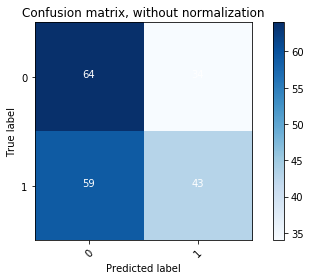

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()



# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(conf_matrix, classes=['0','1'],
                      title='Confusion matrix, without normalization')
